<a href="https://colab.research.google.com/github/nanpiyaporn/stockgrap/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Buy or sell HOOD**

Today: 12/9/2025





In [ ]:
import yfinance as yf
import pandas as pd
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

ticker = 'HOOD'
end_date = '2025-12-09' # User provided 'Today: 12/9/2025' in a text cell
start_date = (pd.to_datetime(end_date) - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Download data
# period='5y' can also be used if the end_date is today's date.
# Since an explicit end_date is given based on user's context, calculating start_date is more robust.
df_hood = yf.download(ticker, start=start_date, end=end_date)

# Display the first 5 rows
display(df_hood.head())

/tmp/ipython-input-1277314764.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_hood = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HOOD,HOOD,HOOD,HOOD,HOOD
Date,,,,,
2021-07-29,34.820000,40.25,33.349998,38.000000,102474700
2021-07-30,35.150002,36.98,33.250000,34.930000,40632200
2021-08-02,37.680000,37.98,35.299999,35.970001,19948500
2021-08-03,46.799999,48.59,37.159000,37.910999,93819200
2021-08-04,70.389999,85.00,54.400002,54.450001,175790500


In [ ]:
#Simulation parametr
num_simulations = 1000
forecast_day = 150

In [ ]:
#Initialize the simulation array with all zero
simulations=np.zeros((num_simulations, forecast_day))

In [ ]:
# prompt: how to get the last price in df['Close']

last_price = df_hood['Close'].iloc[-1]
last_price

,2025-12-08
Ticker,
HOOD,136.429993


In [ ]:
#Caculate the daily return and drop and remove NA value
daily_return = df_hood['Close'].pct_change().dropna()


In [ ]:
#Looping through the number of simulation to forecate future price
for i in range(num_simulations):

    cumulative_return = np.random.choice(daily_return.values.flatten(), size = forecast_day, replace = True).cumsum()
    #Calculate the future prices
    future_price = last_price.iloc[0] * (1+cumulative_return)
    #Storing the future in the simulation
    simulations[i, :] = future_price

In [ ]:
#Print the simulation
print(simulations)

[[145.4355101  141.97901099 140.05583664 ... 212.9828059  212.64461078
  213.13981897]
 [121.68391521 123.48101555 117.93854244 ... 187.56320838 186.0975925
  185.06009073]
 [140.98610416 143.04501132 142.3740501  ...   2.97950415  -4.39374034
   -3.9427361 ]
 ...
 [146.01767511 145.43408577 146.70438853 ... 351.83980871 340.70586593
  340.6722101 ]
 [139.04196689 136.84126454 142.91919172 ... 167.7051873  164.63071141
  158.72561869]
 [135.75527499 134.80690775 131.61001047 ... 212.87647818 215.79534987
  219.40079364]]


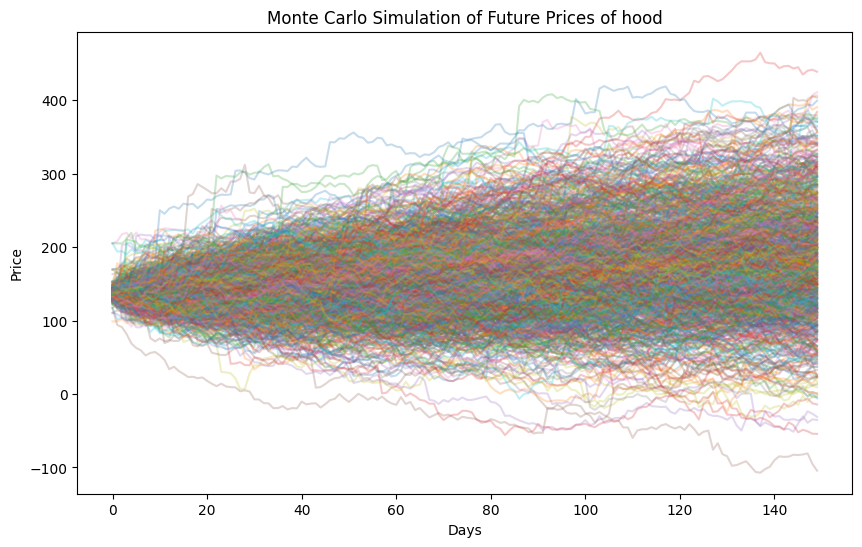

In [ ]:
#plot the result AKA all the simulation
plt.figure(figsize=(10,6))
for i in range(num_simulations):
  plt.plot(simulations[i],alpha=0.25)
plt.title('Monte Carlo Simulation of Future Prices of hood')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()



In [ ]:
#Calculate
expected_future_price = np.mean(simulations[:, -1])
print('Expexted Future Price of Hood in ',forecast_day,'days (5/1/2026):', round(expected_future_price,2))

Expexted Future Price of Hood in  150 days (5/1/2026): 186.02
